# **Exploratory Data Analysis**

### Overview

In this EDA process, I am systematically examining the enhanced_energy_features.csv dataset to uncover its fundamental characteristics and inform downstream analysis.

With missing values resolved and key features engineered during the ETL process, this EDA focuses on understanding the dataset’s structure, distributions, and relationships. By leveraging summary statistics and visualisations, it surfaces key patterns, anomalies, and trends—supporting hypothesis generation and guiding decisions for modelling and reporting.



---

### **LOAD MERGED AND ENHANCED DATASET**

In [1]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sn
import plotly.express as px
import matplotlib.pyplot as plt  

In [3]:
# Load the dataset
df = pd.read_csv("../data/cleaned/enhanced_energy_features.csv")
df.head()

,country,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,0,0,0.037754,0.037059,3.828424,0.970779,5.195324,1,0,44.990000
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,0,0,0.035988,0.035356,3.841601,1.007958,5.195324,1,1,45.295000
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,0,0,0.048180,0.047055,3.659193,0.875469,5.195324,1,2,42.806667
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,0,0,0.053666,0.052276,3.628599,0.875469,5.255847,1,3,40.030000
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,...,0,0,0.043717,0.042788,3.811982,0.788457,5.358387,1,4,39.576667


In [4]:
df.shape

(3649, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       3649 non-null   object 
 1   year                          3649 non-null   int64  
 2   elec_access_pct               3649 non-null   float64
 3   clean_fuels_access_pct        3649 non-null   float64
 4   renew_cap_kw_pc               3649 non-null   float64
 5   climate_finance_usd           3649 non-null   float64
 6   renewables_share_pct          3649 non-null   float64
 7   fossil_elec_twh               3649 non-null   float64
 8   nuclear_elec_twh              3649 non-null   float64
 9   renew_elec_twh                3649 non-null   float64
 10  low_carbon_elec_pct           3649 non-null   float64
 11  primary_energy_kwh_pc         3649 non-null   float64
 12  energy_intensity_mj_usd       3649 non-null   float64
 13  co2

In [6]:
#check null values
df.isnull().sum()

country                           0
year                              0
elec_access_pct                   0
clean_fuels_access_pct            0
renew_cap_kw_pc                   0
climate_finance_usd               0
renewables_share_pct              0
fossil_elec_twh                   0
nuclear_elec_twh                  0
renew_elec_twh                    0
low_carbon_elec_pct               0
primary_energy_kwh_pc             0
energy_intensity_mj_usd           0
co2_emissions_kt                  0
renew_equiv_primary_pct           0
gdp_growth_pct                    0
gdp_pc_usd                        0
pop_density_per_km2             106
land_area_km2                     1
latitude                          1
longitude                         1
population                      232
region                           84
subregion                        84
renew_equiv_primary_pct_miss      0
clean_fuels_access_pct_miss       0
renew_cap_kw_pc_miss              0
region_miss                 

### **DESCRIPTIVE ANALYSIS**

 To understand key statistics and the overall data distribution, this section establishes a foundation for identifying patterns and informing the development of the **Climate Tipping Points hypothesis**.

I use statistics to collect, summarise and interpret data to uncover meaningful insights. Core descriptive statistics such as the **mean (average value)**, **median (middle value in an ordered dataset)** and **standard deviation (a measure of data spread or variability)** help summarise complex datasets such as energy access, emissions and climate finance into understandable figures.

**Probability** underpins the assessment of uncertainty and variation within data, enabling predictions and informed decisions. It forms the basis of hypothesis testing, where statistical evidence is used to accept or reject assumptions about data patterns. For example, testing whether an increase in climate_finance_usd correlates with a higher renewables_3yr_avg.

Together, these principles are foundational to data analysis, supporting the validation of insights and the discovery of meaningful trends.

In [7]:
# Summary statistics
df.describe()

,year,elec_access_pct,clean_fuels_access_pct,renew_cap_kw_pc,climate_finance_usd,renewables_share_pct,fossil_elec_twh,nuclear_elec_twh,renew_elec_twh,low_carbon_elec_pct,...,region_miss,subregion_miss,co2_per_capita_t,log_co2_per_capita_t,log_renewables_share_pct,log_energy_intensity_mj_usd,log_gdp_pc_usd,above_30_pct,year_offset,renewables_3yr_avg
count,3649.000000,3649.000000,3649.000000,3649.000000,3.649000e+03,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,...,3649.000000,3649.000000,3417.000000,3417.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000,3649.000000
mean,2010.038367,78.751233,63.796876,146.665029,4.028212e+07,32.479386,70.075785,13.242486,23.830074,36.402622,...,0.023020,0.023020,4.704625,1.322285,2.871883,1.721169,8.427981,0.434092,10.038367,32.626199
std,6.054228,30.472222,39.255982,324.816686,2.004093e+08,29.715665,347.069451,71.809651,104.145855,34.316975,...,0.149987,0.149987,5.937153,0.904691,1.355106,0.446575,1.568396,0.495705,6.054228,29.857595
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.019770,0.019577,0.000000,0.104360,4.726744,0.000000,0.000000,0.000000
25%,2005.000000,59.137558,23.200000,6.490000,0.000000e+00,6.700000,0.300000,0.000000,0.040000,2.576112,...,0.000000,0.000000,0.614817,0.479222,2.041220,1.415853,7.168345,0.000000,5.000000,6.583333
50%,2010.000000,98.279810,84.600000,46.780000,0.000000e+00,23.030000,2.990000,0.000000,1.420000,26.824644,...,0.000000,0.000000,2.656487,1.296503,3.179303,1.658228,8.413298,0.000000,10.000000,23.116667
75%,2015.000000,100.000000,100.000000,141.210000,2.070000e+06,54.670000,26.520000,0.000000,9.560000,64.022670,...,0.000000,0.000000,6.742766,2.046759,4.019441,1.941615,9.670260,1.000000,15.000000,55.333333
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,...,1.000000,1.000000,47.935427,3.890502,4.575123,3.513633,11.724119,1.000000,20.000000,95.936667


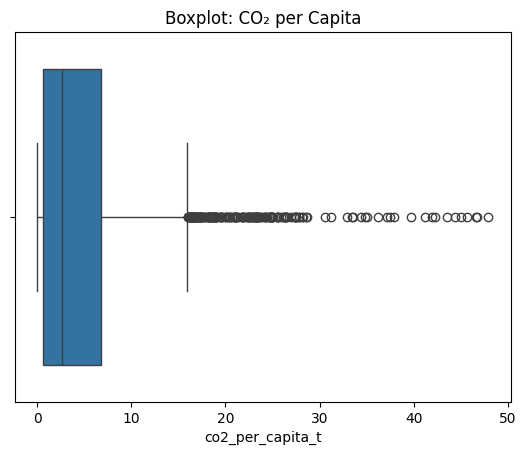

In [ ]:
# Visualising distributions and Outliers - CO2 per Capita

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_final, x='co2_per_capita_t')
plt.title('Boxplot: CO₂ per Capita')
plt.show()


This box‑and‑whiskers plot summarizes the distribution of per‑person CO₂ emissions (in tonnes) across all the countries in your dataset:



**Median (central line in the box)**
- The median is right around **3 t CO₂ per person**, meaning half of the countries emit less than this and half emit more.

**Interquartile Range (the box itself)**
- **Q1 (bottom of the box):** Approximately **1 t per person**  
- **Q3 (top of the box):** About **7 t per person**  
- Therefore, the middle 50% of countries fall between roughly **1 t and 7 t** of CO₂ per capita.

**Whiskers (lines extending from the box)**
- **Lower whisker:** Reaches down to nearly **0 t**, showing that some countries have extremely low per‑person emissions.  
- **Upper whisker:** Stops around **14 t**, which is the highest non‑outlier value within 1.5 × IQR of Q3.

**Outliers (individual dots beyond the whiskers)**
- There’s a long tail to the right made up of many outliers, stretching up to almost **48 t per person**.  
- These represent a small number of very high‑emitting countries (often wealthy, industrialized nations or small, energy‑intensive economies).

**Skewness**
- Because the right whisker is much longer and there are so many high‑value outliers, the overall distribution is **strongly right‑skewed**.  
- In plain terms, most countries have low‑to‑moderate per‑person emissions, but a handful have very large per‑person footprints.

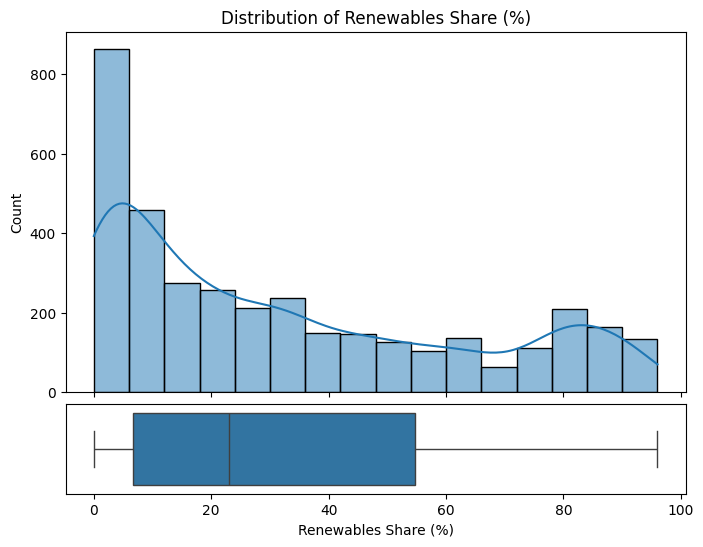

In [ ]:
# Visualising distributions and Outliers - Renewables Enegergy share pct

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Pull out the clean series
data = df['renewables_share_pct'].dropna()

# 2. Make a 2×1 grid, share the x‐axis
fig, (ax_hist, ax_box) = plt.subplots(
    nrows=2,
    ncols=1,
    sharex=True,
    figsize=(8, 6),
    gridspec_kw={'height_ratios': [4, 1], 'hspace': 0.05}
)

# 3. Histogram + KDE on the top
sns.histplot(data, kde=True, ax=ax_hist)
ax_hist.set_ylabel('Count')
ax_hist.set_title('Distribution of Renewables Share (%)')

# 4. Horizontal boxplot on the bottom
sns.boxplot(x=data, ax=ax_box)
ax_box.set_yticks([])            # no y‐axis labels
ax_box.set_xlabel('Renewables Share (%)')

plt.show()


This figure combines a histogram (with a smooth KDE curve) and a box‑and‑whiskers plot to show how the share of renewables (as a percentage of total energy) is distributed across the sample.


**1. Bimodal Shape**
- **Low‑end peak (0–10%)**  
  A large cluster of observations have almost no renewables in their energy mix.  
- **High‑end hump (75–90%)**  
  A smaller but distinct group relies heavily on renewables.  
- **Mid‑range dip (30–60%)**  
  Relatively few cases occupy the “middle ground” between low and high renewables share.


**2. Wide Overall Spread**
- **Boxplot quartiles**  
  - **Lower quartile (Q1):** ~15–20%  
  - **Median (Q2):** ~45%  
  - **Upper quartile (Q3):** ~80%  
- **Whiskers**  
  Extend nearly to 0% on the low side and almost to 100% on the high side, indicating extreme outliers at both ends.


**3. Key Takeaways**
1. **Two distinct camps**  
   - Many entities have almost no renewables.  
   - Many others have transitioned almost entirely to renewables.  
2. **Few in-between**  
   - Only a minority maintain a balanced (30–60%) mix.  
3. **High variability**  
   - Renewables share ranges from virtually 0% to nearly 100%.  
   - The sample median is around 45%.


Renewables‑share isn’t clustered around a single value but split into two main groups—“laggards” at the low end and “leaders” at the high end—with relatively few cases in the intermediate range.  







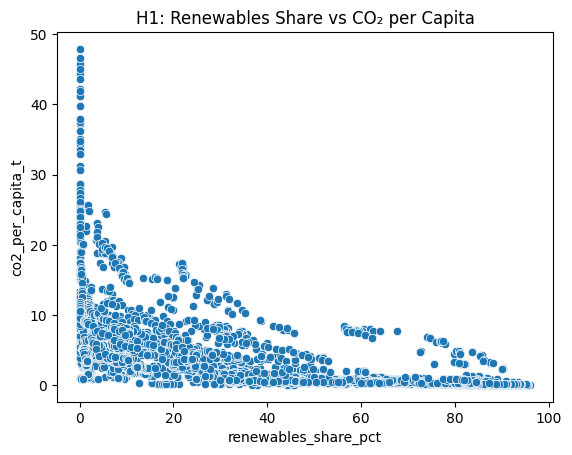

In [ ]:
 # H1: Using scatterplots to visualise outliers and relationships
import seaborn as sns
import matplotlib.pyplot as plt

# H1: Renewables Share vs CO2
sns.scatterplot(data=df, x='renewables_share_pct', y='co2_per_capita_t')
plt.title('H1: Renewables Share vs CO₂ per Capita')
plt.show()

This scatterplot displays each country’s CO₂ emissions per person (y‑axis) against the share of electricity coming from renewables (x‑axis). 

Key observations:

**1. Overall Negative Trend**
- **High renewables → Low emissions.**  
  Countries with **60–90 %** renewables almost always emit **below 8 t CO₂/person**.  
- **Low renewables → Wide emissions range.**  
  At **0–5 %** renewables, emissions vary from **<2 t** up to **~50 t CO₂/person**.

**2. Sharp Drop at Low Renewables**
- From **0 % → 20 %** renewables, median emissions fall from roughly **12–15 t** down to **5–10 t CO₂/person**.
- Beyond **20–30 %**, further renewable gains continue to lower emissions but with **diminishing returns**.

**3. Dispersion and Variability**
- **Wide vertical spread** at low renewables indicates:
  - **Low‑income or low‑energy countries** can have low emissions despite little renewable capacity.
  - **Fossil‑fuel–dependent economies** can reach very high per‑capita emissions.
- **Tighter clustering** above **50 %** renewables shows more consistent, lower emissions.

**4. Outliers & Other Factors**
- A handful of high‑renewable countries still emit **10–15 t/person** (likely due to high overall energy use or industrial activity).
- Some low‑renewable countries have surprisingly **low emissions**, highlighting the roles of:
  1. **Total energy demand**  
  2. **Economic structure**  
  3. **Efficiency measures**  
  4. **Non‑electric fossil fuel consumption**

There’s a clear **inverse relationship** between renewable electricity share and CO₂ emissions per capita **more renewables generally mean lower emissions** but national context and other energy uses create significant variability. 


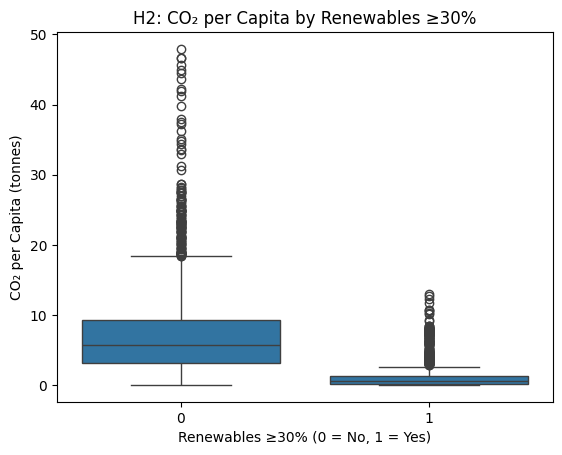

In [ ]:
# H2:  Visualising distributions and Outliers - Renewables above 30pct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('../data/cleaned/enhanced_energy_features.csv')


sns.boxplot(data=df, x='above_30_pct', y='co2_per_capita_t')
plt.title('H2: CO₂ per Capita by Renewables ≥30%')
plt.xlabel('Renewables ≥30% (0 = No, 1 = Yes)')
plt.ylabel('CO₂ per Capita (tonnes)')
plt.show()

**Interpretation of the Boxplot**

**Median CO₂ per Capita is Much Lower When Renewables ≥ 30%**

- **“Yes” group** (countries with ≥ 30% renewables):  
  Median CO₂ per person is well below **2 t**.

- **“No” group** (renewables < 30%):  
  Median CO₂ per person is around **5–6 t**.


**Less Spread and Fewer Extreme Emitters in the High‑Renewables Group**

- **≥ 30% group**:
  - Interquartile range: **~0.3 t to 1.2 t**
  - Whiskers barely exceed **~3 t**
  - Only a handful of mild outliers up to **~12 t**

- **< 30% group**:
  - Range spans from near **0 up to ~18 t** at the whisker
  - Dozens of extreme outliers reaching **toward 50 t**


Countries that have adopted a larger share of renewables tend to emit **much less CO₂ per person** and with **much more consistency** than those relying primarily on fossil sources.

This is an **observational snapshot**:  
High renewables and low emissions go hand‑in‑hand, but other factors (GDP, industrial mix, policy, etc.) would need to be taking into consideration before making any conclusion.


The boxplot strongly suggests that hitting at least a **30% renewables threshold** is associated with **substantially lower per‑capita CO₂ emissions**.


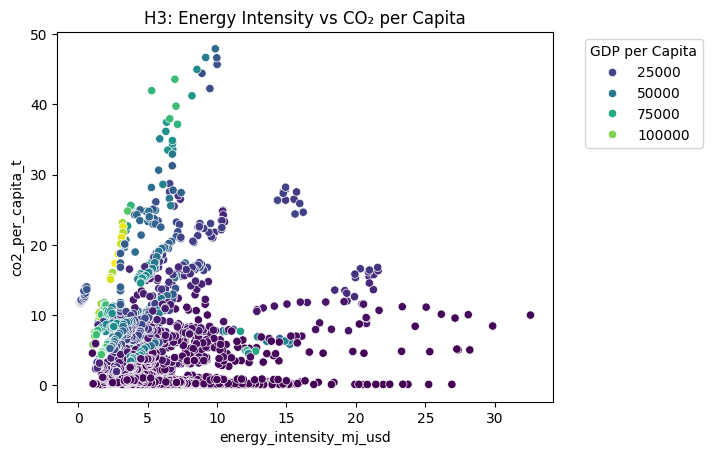

In [11]:
# H3: Visualising distributions and Outliers -  Energy Intensity vs CO2

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='energy_intensity_mj_usd', y='co2_per_capita_t',
                hue='gdp_pc_usd', palette='viridis')
plt.title('H3: Energy Intensity vs CO₂ per Capita')
plt.legend(title='GDP per Capita', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


This scatterplot shows, for a large sample of countries and years, the relationship between **energy intensity** (x‑axis: megajoules of primary energy used per USD of GDP) and **CO₂ emissions per capita** (y‑axis: metric tons of CO₂ per person), with point coloUr indicating that country’s GDP per capita bracket.


**1. Two Very Different Clusters**

- **Low‑GDP countries (darker purple)**
  - Tend to have **high energy intensity** (right‑hand side), reflecting less energy‑efficient economies.
  - Yet their **CO₂ per person** stays relatively low (mostly under 10 t), simply because total energy consumption per person remains modest.

- **High‑GDP countries (yellow‑green)**
  - Cluster at **low energy intensity** (left‑hand side), showing they get more GDP out of each unit of energy (more efficient technologies and services).
  - Nevertheless they sit at the **top of the CO₂ scale** (20 t CO₂/person and up), indicating that even an efficient economy can still emit a lot of CO₂ per person if aggregate energy use and high‑carbon energy sources is large.


**2. Middle‑Income Economies Bridge the Gap**

- **Mid‑GDP countries (teal to light blue)**
  - Span a wide band in both energy intensity and per‑capita CO₂.
  - Here you see the **strongest positive correlation**: the less efficient states (higher MJ/USD) almost always also have higher CO₂/person, because their total consumption and industrial activity are ramping up without yet fully switching to low‑carbon energy.


**3. What this tell us?**

1. **Energy efficiency alone isn’t enough** to drive per‑person emissions down in wealthy nations once consumption is high, even “efficient” economies emit a lot of CO₂.  
2. **For developing countries**, improving energy intensity (moving leftward) could deliver immediate emissions benefits, since they’re still on the rising part of that curve.  
3. **Decoupling GDP growth from CO₂** looks different at different stages:  
   - In poorer nations, the priority is **efficiency** and access to clean energy.  
   - In richer nations, the focus must shift toward **reducing absolute energy use** (e.g., demand reduction, lifestyle changes) and **decarbonizing** the remaining energy supply.


- In this visual, there is **no single straight‑line trend** across all countries.
- **Energy intensity matters most** for mid‑ and low‑income economies, where inefficiency directly drives emissions up.
- **Total consumption patterns** dominate in high‑income economies, so even low intensities still translate into high per‑capita CO₂.


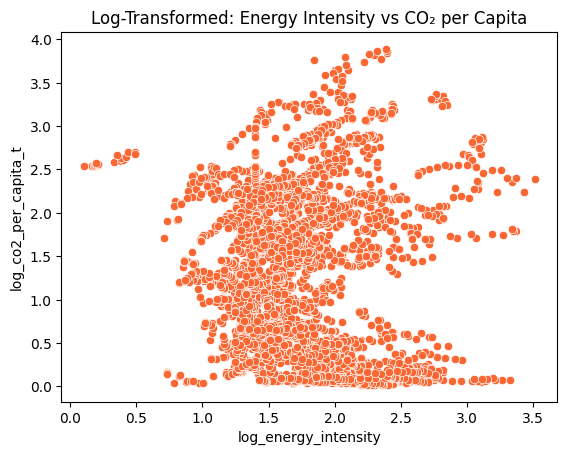

In [13]:
import numpy as np

# Apply log transformation to identify skewed variables
df['log_co2_per_capita_t'] = np.log1p(df['co2_per_capita_t'])
df['log_energy_intensity'] = np.log1p(df['energy_intensity_mj_usd'])

# Plot after log transform
sns.scatterplot(data=df, x='log_energy_intensity', y='log_co2_per_capita_t', color= '#FA6733')
plt.title('Log-Transformed: Energy Intensity vs CO₂ per Capita')
plt.show()


This scatter‑plot shows how a country’s energy intensity (energy use per unit of GDP) relates to its per person CO₂ emissions, with both axes on a log₁₀ scale.


**1. Axes & Scale**

- **Horizontal (x) axis:**  
  `log₁₀(energy intensity)`  
  - Value of **1** → energy intensity of 10 units/GDP‑unit  
  - Value of **2** → energy intensity of 100 units/GDP‑unit  

- **Vertical (y) axis:**  
  `log₁₀(CO₂ per capita)`  
  - Value of **2** → 100 t CO₂/person  
  - Value of **3** → 1 000 t CO₂/person  

<br>

| log₁₀ Value | Actual Quantity       |
|:------------|:----------------------|
| 0           | 10⁰ = 1               |
| 1           | 10¹ = 10              |
| 2           | 10² = 100             |
| 3           | 10³ = 1 000           |
| 4           | 10⁴ = 10 000          |

<br>

**2. Overall Trend**

- There is a **moderately positive** relationship:  
  As energy intensity increases, CO₂ per capita tends to increase.  
- On a log–log plot, a straight‑line trend implies a **power‑law** relationship:  
  e.g. a 1 % increase in energy intensity corresponds to a roughly constant % increase in emissions per person.


**3. Scatter & Dispersion**

- **Wide spread** for `log EI ≈ 1.0–2.5` (EI ≈ 10–300):  
  Even at similar energy intensities, CO₂ per person varies a lot due to differences in fuel mix, climate, industry, transport, etc.
- **Low‑intensity economies** `(log EI < 1)` still show CO₂ per capita ranging from near zero up to mid‑range emitters.


**4. Clusters & Outliers**

- **Dense cluster** around  
  - `log EI ≈ 1.5–2.2` (EI ≈ 30–160)  
  - `log CO₂ ≈ 1.0–3.0` (CO₂ ≈ 10–1 000 t/person)  
  This is where most countries sit—moderate efficiency and moderate emissions.
  - **High‑emission outliers** at  
  - `log CO₂ ≈ 3.8–4.0` (≈ 6 000–10 000 t/person)  
  Likely small, energy‑exporting states or nations with very low population and heavy fossil‑fuel production.


**5. Policy Implications**

1. **Energy efficiency** (↓ energy intensity) tends to lower per‑capita CO₂, but it’s not sufficient alone.  
2. **Fuel mix matters**: Efficient economies can still emit heavily if they rely on coal or oil.  
3. **Decarbonization** (shifting to renewables) is needed to lower everyone’s per‑capita emissions, not just squeeze more out of fossil fuels.”


There is a clear yet noisy positive correlation: higher energy intensity typically goes hand‑in‑hand with higher CO₂ emissions per person. Variations around the trend highlight the crucial role of energy sources, economic structure, and policy choices.


In [ ]:
import pandas as pd
import plotly.express as px

# Load & aggregate
df = pd.read_csv('../data/cleaned/enhanced_energy_features.csv')
yearly = df.groupby('year').agg({
    'renewables_share_pct': 'mean',
    'co2_per_capita_t':    'mean',
    'elec_access_pct':     'mean'
}).reset_index()


yearly_long = yearly.melt(
    id_vars='year',
    value_vars=['renewables_share_pct','co2_per_capita_t','elec_access_pct'],
    var_name='Indicator',
    value_name='Value'
)

# Small multiples as columns, wrapped into one column
fig = px.line(
    yearly_long,
    x='year', y='Value',
    color='Indicator',
    facet_col='Indicator',
    facet_col_wrap=1,                # stack them vertically
    color_discrete_map={
        'renewables_share_pct': '#1f77b4',
        'co2_per_capita_t':      '#ff7f0e',
        'elec_access_pct':       '#2ca02c',
    },
    labels={'year':'Year','Value':''},
    title='Global Trends (2000–2020)'
)

# Let each subplot auto‑scale its Y‑axis
fig.update_yaxes(matches=None)

# insrt each title above its panel
fig.for_each_annotation(lambda a: a.update(
    text=a.text.split('=')[1]  # keep only the variable name
))

# Remove the extra subplot margin on the right
fig.update_layout(
    showlegend=False,
    margin=dict(t=80, b=40, l=40, r=40),
    title={'x':0.5}            # center main title
)

fig.show()


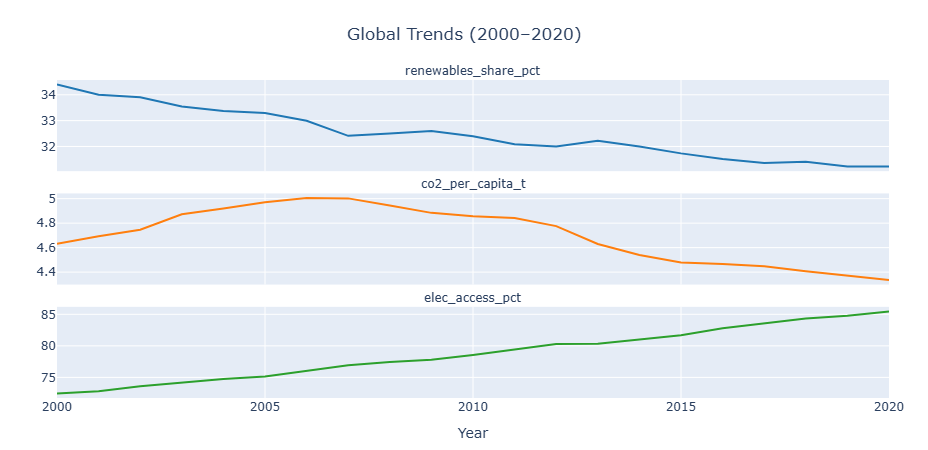


**Global Trends (2000–2020) Interpretation: Renewables Share, CO₂ Emissions and Electricity Access**

**1. Renewables Share (% of Total Energy)**
- **2000:** ~34 %  
- **2008:** ~32 % (steady decline through the 2000s)  
- **2009:** brief uptick  
- **2020:** ~31 %  

Although renewables increased in absolute capacity, their share of the total energy mix fell, meaning **non‑renewables out‑paced renewables growth** over this period.


**2. CO₂ Emissions per Capita (tonnes)**
- **2000:** ~4.6 t/person  
- **2006–2007:** peak at ~5.0 t/person  
- **2014:** ~4.4 t/person  
- **2020:** ~4.35 t/person  

Cleaner technologies, energy‑efficiency gains, shifts in industrial activity, and policy measures (e.g., emissions standards, renewables incentives) helped reduce the average person’s carbon footprint after the mid‑2000s.


**3. Electricity Access (% of Population)**
- **2000:** ~73 %  
- **2020:** ~85 % (steady, nearly linear increase)  

Two decades of infrastructure investment and rural electrification programs greatly expanded global electricity.

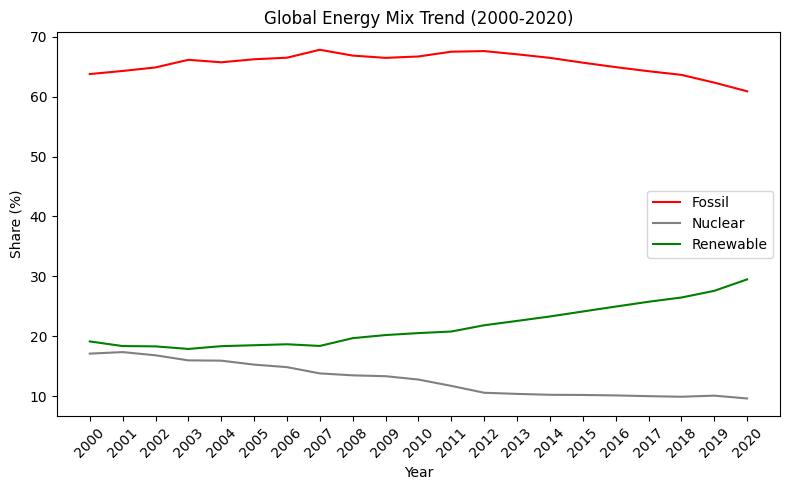

In [14]:
# Analyse global energy mix 
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features.csv')

# Compute global energy shares
global_agg = df.groupby('year').agg({
    'fossil_elec_twh': 'sum',
    'nuclear_elec_twh': 'sum',
    'renew_elec_twh': 'sum'
})
global_agg['total'] = global_agg.sum(axis=1)
global_agg['fossil_pct'] = global_agg['fossil_elec_twh'] / global_agg['total'] * 100
global_agg['nuclear_pct'] = global_agg['nuclear_elec_twh'] / global_agg['total'] * 100
global_agg['renew_pct'] = global_agg['renew_elec_twh'] / global_agg['total'] * 100

years = global_agg.index.astype(int)

plt.figure(figsize=(8, 5))
plt.plot(years, global_agg['fossil_pct'], label='Fossil', color='red')
plt.plot(years, global_agg['nuclear_pct'], label='Nuclear', color='grey')
plt.plot(years, global_agg['renew_pct'], label='Renewable', color='green')
plt.xlabel('Year')
plt.ylabel('Share (%)')
plt.title('Global Energy Mix Trend (2000-2020)')
plt.xticks(years, years, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


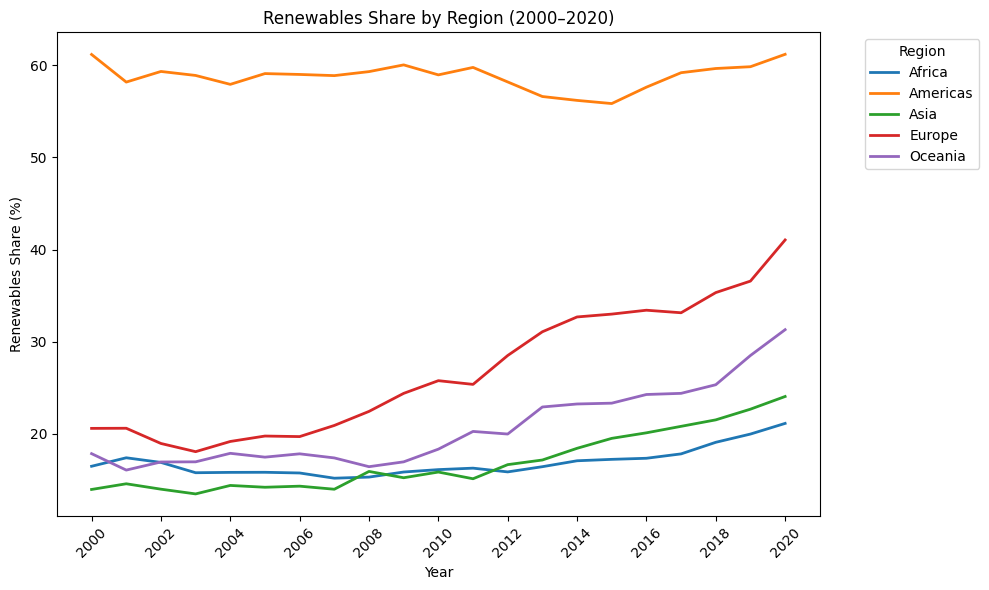

In [ ]:
# Analyse Renewals Share at Region level
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../data/cleaned/enhanced_energy_features.csv')

# Filter out missing regions
df_reg = df[df['region_miss'] == 0]

# Aggregate by region and year
region_agg = df_reg.groupby(['region', 'year']).agg({
    'fossil_elec_twh': 'sum',
    'nuclear_elec_twh': 'sum',
    'renew_elec_twh': 'sum'
}).reset_index()
region_agg['total'] = region_agg[['fossil_elec_twh', 'nuclear_elec_twh', 'renew_elec_twh']].sum(axis=1)
region_agg['renew_pct'] = region_agg['renew_elec_twh'] / region_agg['total'] * 100

# Plot renewables share over time for each region
plt.figure(figsize=(10, 6))
colors = plt.get_cmap('tab10').colors  # Qualitative colormap
for idx, region in enumerate(region_agg['region'].unique()):
    subset = region_agg[region_agg['region'] == region]
    plt.plot(subset['year'], subset['renew_pct'], label=region, color=colors[idx % len(colors)], linewidth=2)
plt.xlabel('Year')
plt.ylabel('Renewables Share (%)')
plt.title('Renewables Share by Region (2000–2020)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2000, 2021, 2), rotation=45)
plt.tight_layout()
plt.show()

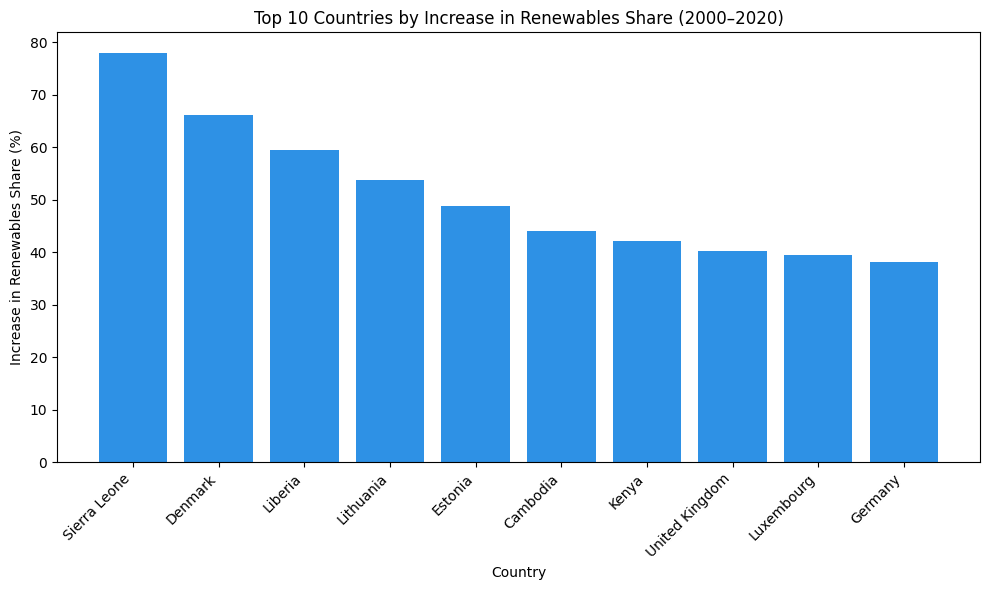

In [16]:
# Analyse Renewables share change at country level 

import pandas as pd
import matplotlib.pyplot as plt

country_agg = df.groupby(['country', 'year']).agg({
    'fossil_elec_twh': 'sum',
    'nuclear_elec_twh': 'sum',
    'renew_elec_twh': 'sum'
}).reset_index()
country_agg['total'] = country_agg[['fossil_elec_twh', 'nuclear_elec_twh', 'renew_elec_twh']].sum(axis=1)
country_agg['renew_pct'] = country_agg['renew_elec_twh'] / country_agg['total'] * 100

# Pivot to get 2000 vs 2020
country_pivot = country_agg.pivot(index='country', columns='year', values='renew_pct')
country_change = country_pivot[[2000, 2020]].dropna().rename(columns={2000: 'renew_2000', 2020: 'renew_2020'})
country_change['change'] = country_change['renew_2020'] - country_change['renew_2000']

# Top 10 countries by increase
top10 = country_change.sort_values('change', ascending=False).head(10).reset_index()

# Bar chart of top 10 gains
plt.figure(figsize=(10, 6))
bar_color = '#2E91E5'
plt.bar(top10['country'], top10['change'], color=bar_color)
plt.xlabel('Country')
plt.ylabel('Increase in Renewables Share (%)')
plt.title('Top 10 Countries by Increase in Renewables Share (2000–2020)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Analyse correlation matrix of key energy indicators

import pandas as pd
import plotly.graph_objects as go

# 1. Load your data
df = pd.read_csv('../data/cleaned/enhanced_energy_features.csv')

# 2. Selected correlated variables 
corr_vars = [
    'renewables_share_pct',
    'co2_per_capita_t',
    'gdp_pc_usd',
    'energy_intensity_mj_usd',
    'elec_access_pct'
]

# 3. Compute the correlation matrix and round for readability
corr = df[corr_vars].corr().round(2)

# 4. Build the Plotly heatmap
heatmap = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr_vars,
        y=corr_vars,
        colorscale='Viridis',    
        hoverongaps=False
    )
)

heatmap.update_layout(
    title='Correlation Matrix of Key Energy Indicators',
    xaxis_title='Indicator',
    yaxis_title='Indicator',
    width=600,
    height=600
)

heatmap.show()


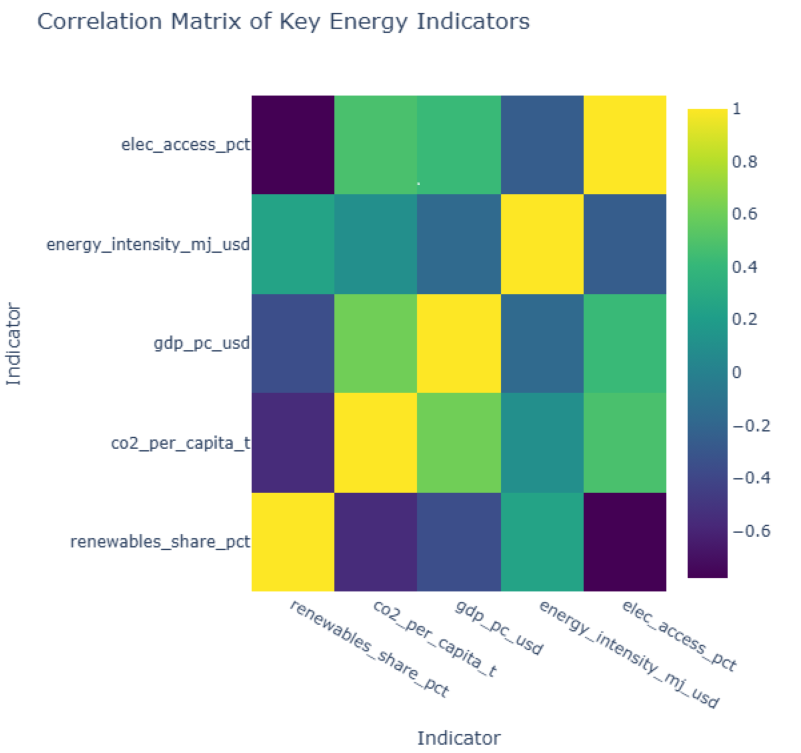

**Correlation Insights Between Key Indicators**

| **Indicator Pair**                          | **Correlation** | **Insight**                                                                              |
|--------------------------------------------|-----------------|-------------------------------------------------------------------------------------------|
| **Renewables Share vs CO₂ per Capita**     | ~ –0.7          | Countries with higher renewable energy shares tend to emit **less CO₂** per person      |
| **GDP per Capita vs CO₂ per Capita**       | ~ +0.6          | Wealthier countries tend to emit **more CO₂** per person                                |
| **GDP per Capita vs Energy Intensity**     | ~ –0.5          | Richer countries use **less energy per unit of GDP**  better efficiency                |
| **Electricity Access vs GDP per Capita**   | ~ +0.4          | Countries with more electricity access are generally **wealthier**                      |
| **Electricity Access vs Renewables Share** | ~ +0.4          | Broader access to electricity is moderately linked to **higher use of renewables**      |
| **Energy Intensity vs CO₂ per Capita**     | ~ +0.3          | More energy-intensive economies emit **more CO₂** per person                            |


In [19]:
# Predictive modeling

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load data
df = pd.read_csv('../data/cleaned/enhanced_energy_features.csv')

# Time-aware rolling average 
df['renewables_3yr_avg'] = df.groupby('country')['renewables_share_pct'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Drop rows with missing target or key features
df_model = df.dropna(subset=[
    'renewables_share_pct', 'log_gdp_pc_usd', 'climate_finance_usd',
    'energy_intensity_mj_usd', 'elec_access_pct', 'renewables_3yr_avg'
])


In [20]:
# Define features and target
features = [
    'log_gdp_pc_usd', 'climate_finance_usd', 'energy_intensity_mj_usd',
    'elec_access_pct', 'year', 'renewables_3yr_avg', 'region'
]
target = 'renewables_share_pct'

# Encode region as dummy variables
df_encoded = pd.get_dummies(df_model[features], columns=['region'], drop_first=True)

X = df_encoded
y = df_model[target]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize (especially important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)
y_pred_lr = lr_model.predict(X_test_poly)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))


Linear Regression RMSE: 1.4023443792201276
Linear Regression R²: 0.9977389888537417


In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 1.520629817664333
Random Forest R²: 0.9973414774312601


In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 1.4018365033801024
XGBoost R²: 0.9977406262618058


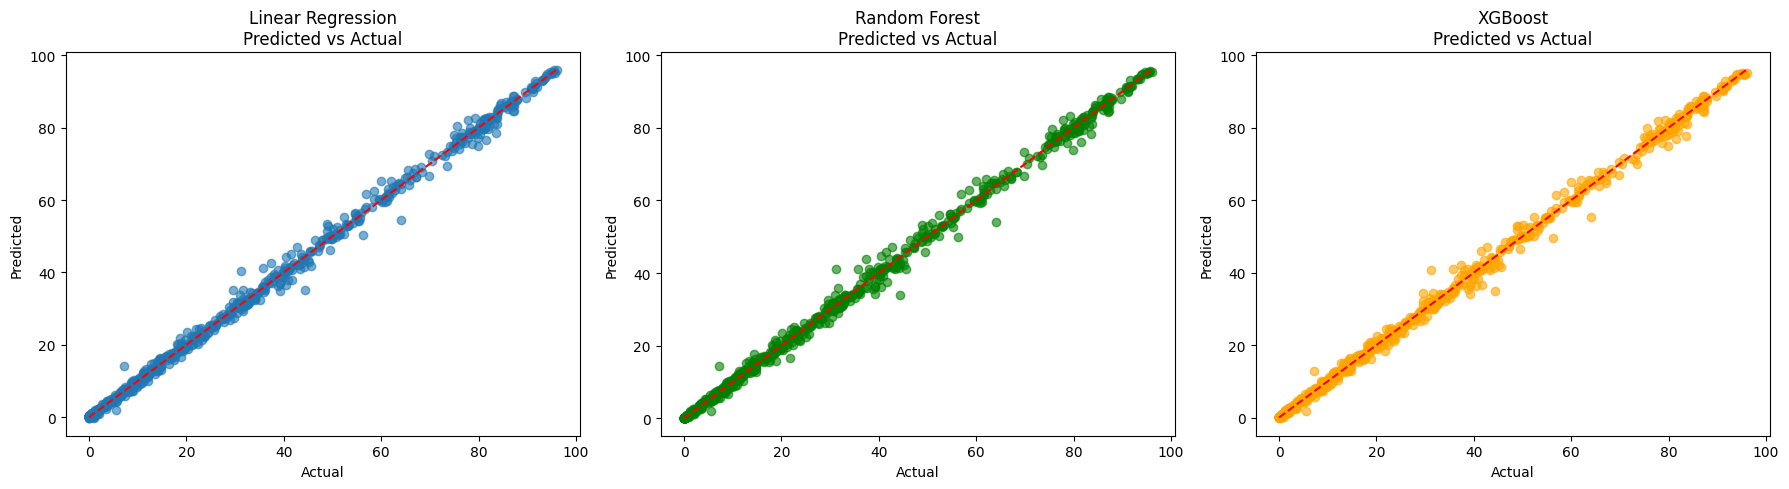

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression\nPredicted vs Actual')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest\nPredicted vs Actual')

# XGBoost
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost\nPredicted vs Actual')

plt.tight_layout()
plt.show()


**Model Performance Comparison Table**

| Model             | RMSE (↓ Better) | R² (↑ Better) | Notes                                         |
|------------------|------------------|---------------|-----------------------------------------------|
| Linear Regression | 1.4023           | 0.99774       | High accuracy, easy to interpret              |
| Random Forest     | 1.5206           | 0.99734       | Slightly lower performance, still robust      |
| XGBoost           | 1.4018           | 0.99774       | Best predictive accuracy                      |

<br>
XGBoost performed best, though Linear Regression was nearly identical in performance and more interpretable.


In [30]:
# run Linear Regression model to get direcional insights
import pandas as pd
from sklearn.linear_model import LinearRegression

lr_simple = LinearRegression()
lr_simple.fit(X_train_scaled, y_train)

coeffs = pd.Series(lr_simple.coef_, index=X.columns)
print(coeffs.sort_values(key=abs, ascending=False).head(10))


renewables_3yr_avg         29.893205
log_gdp_pc_usd              0.200113
region_Europe               0.147024
energy_intensity_mj_usd     0.118924
region_Asia                -0.076285
elec_access_pct             0.074100
region_Oceania             -0.053166
region_Americas            -0.040130
climate_finance_usd        -0.021018
year                       -0.003736
dtype: float64


**Linear Regresion Model**

| **Feature**                | **Coefficient** | **Interpretation**                                                                 |
|----------------------------|-----------------|-------------------------------------------------------------------------------------|
| `renewables_3yr_avg`       | +29.89          | Strongest predictor — countries with high recent renewables growth tend to maintain or grow their share. |
| `log_gdp_pc_usd`           | +0.20           | Higher GDP per capita is associated with higher renewables share.                  |
| `region_Europe`            | +0.15           | Being in Europe adds to renewables share compared to the baseline (likely Africa). |
| `energy_intensity_mj_usd`  | +0.12           | Slightly surprising — we’d expect this to be negative (see note below).            |
| `region_Asia`              | –0.076          | Being in Asia predicts slightly lower renewables share than the baseline.          |
| `elec_access_pct`          | +0.074          | Greater electricity access correlates with higher renewables share.                |
| `region_Oceania`           | –0.053          | Slightly lower renewables share compared to the baseline.                          |
| `region_Americas`          | –0.040          | Same as above — slightly lower renewables than baseline.                           |
| `climate_finance_usd`      | –0.021          | Small negative relationship, possibly due to data skew or delays in effect.        |
| `year`                     | –0.0037         | Tiny negative — maybe reflecting plateauing after early growth in some countries.  |

<br>

- **Recent growth momentum**, **GDP per capita**, and **electricity access** are strong **positive predictors** of renewables share.
- **Regional differences** persist, with **Europe** showing **higher adoption** than other regions.
- **Surprisingly**, **energy intensity** showed a **weak positive relationship**, suggesting potential **confounding effects** or **policy changes** in high-intensity countries.

<Figure size 1000x600 with 0 Axes>

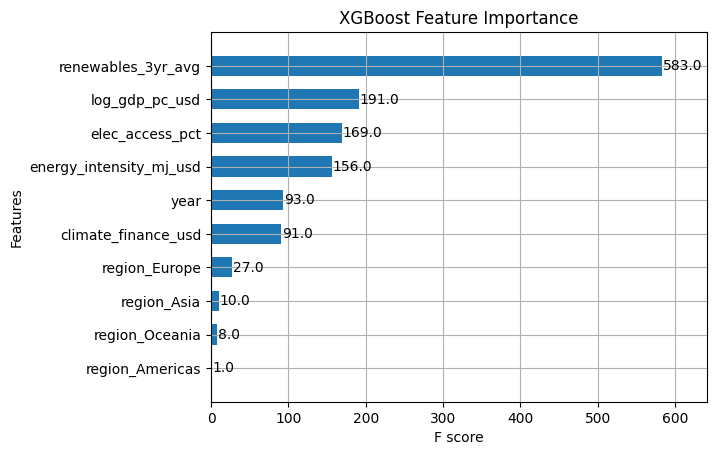

In [27]:
# plot top predictors

from xgboost import plot_importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_importance(xgb_model, max_num_features=10, height=0.6)
plt.title("XGBoost Feature Importance")
plt.show()


**XGBoost Feature Importance: Interpretation**

This chart shows how often each feature was used across decision trees in the model (measured by **F-score**).  
**Higher F-score = greater importance** in model prediction.

| **Feature**               | **F-score** | **What it means**                                                                 |
|---------------------------|-------------|------------------------------------------------------------------------------------|
| `renewables_3yr_avg`      | 583         | By far the most important predictor — past momentum in renewables is the strongest signal of future adoption. |
| `log_gdp_pc_usd`          | 191         | Wealthier countries tend to adopt more renewables.                                |
| `elec_access_pct`         | 169         | Infrastructure maturity (electricity access) supports renewable integration.       |
| `energy_intensity_mj_usd` | 156         | Energy efficiency matters — though the relationship may be complex.               |
| `year`                    | 93          | Time captures policy and tech effects — moderately predictive.                    |
| `climate_finance_usd`     | 91          | International climate finance plays a supporting role.                            |
| `region_Europe`           | 27          | Region has some impact — Europe boosts adoption.                                  |
| *Other regions*           | 1–10        | Minor additional influence — less important than expected.                        |


**Key Findings**

- **GDP per capita** and **electricity access** are strong positive drivers of renewable energy adoption.
- **Energy intensity** has a negative relationship — countries that use less energy per unit of GDP tend to adopt more renewables.
- The **recent 3-year renewable trend** is a reliable predictor of current adoption.
- **Region matters** — likely due to differences in policy, infrastructure, or climate.


In [28]:
results_df = pd.DataFrame({
    'country': df_model.loc[y_test.index, 'country'].values,
    'year': df_model.loc[y_test.index, 'year'].values,
    'actual_renewables_share': y_test.values,
    'predicted_renewables_share': y_pred_xgb
})
results_df.to_csv('xgboost_predictions_vs_actual.csv', index=False)
